# Decision Trees and Random Forests

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')
# https://www.kaggle.com/abbasit/kyphosis-dataset 

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


C:\Users\20002890\AppData\Local\Continuum\anaconda3\envs\PXL_SS\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


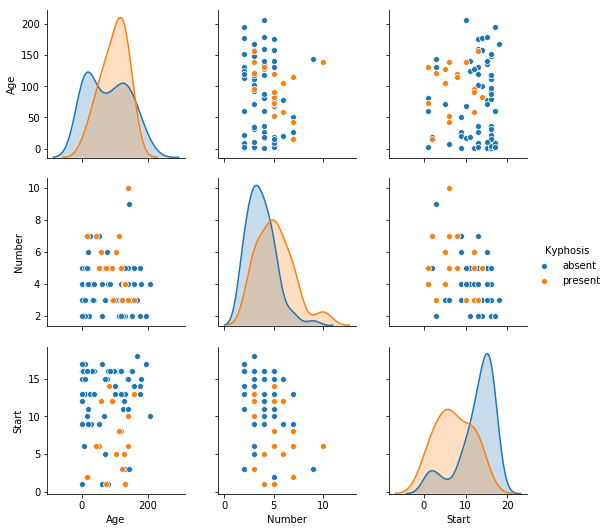

In [5]:
sns.pairplot(df,hue='Kyphosis')

## Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

In [11]:
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.83      0.75      0.79        20
     present       0.29      0.40      0.33         5

   micro avg       0.68      0.68      0.68        25
   macro avg       0.56      0.57      0.56        25
weighted avg       0.72      0.68      0.70        25



Precision: TP / (TP+FP)  
Recall: TP / (FP+FN)  
f1-score: 2 * (Precision * Recall) /( Precision + Recall)  
support: number of samples  

In [12]:
print(confusion_matrix(y_test,predictions))

[[15  5]
 [ 3  2]]


## Tree Visualization

In [14]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

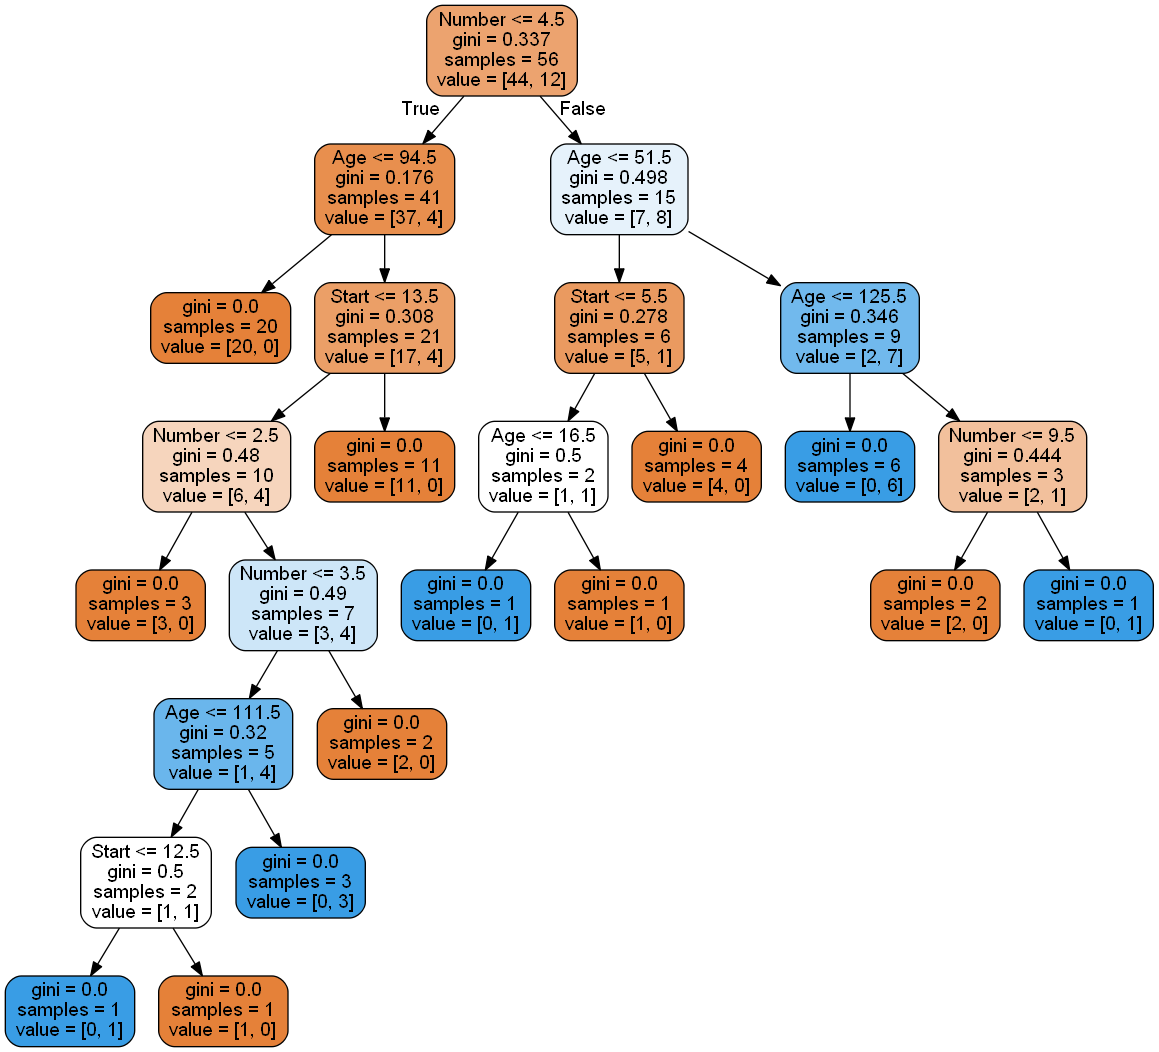

In [15]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests 

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
rfc_pred = rfc.predict(X_test)

In [18]:
print(confusion_matrix(y_test,rfc_pred))

[[16  4]
 [ 3  2]]


In [19]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.84      0.80      0.82        20
     present       0.33      0.40      0.36         5

   micro avg       0.72      0.72      0.72        25
   macro avg       0.59      0.60      0.59        25
weighted avg       0.74      0.72      0.73        25



Precision: TP / (TP+FP)  
Recall: TP / (FP+FN)  
f1-score: 2 * (Precision * Recall) /( Precision + Recall)  
support: number of samples  